In [1]:
import csv
import pandas as pd
from sklearn import preprocessing
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import h5py
import wandb
from pathlib import Path


In [2]:

csv_path = r"C:\Users\mktha\Documents\projects\felix\data\RawDataMagExtended(newdataset).csv"

df_mag = pd.read_csv(csv_path, header=0, index_col=0)

csv_path = r"C:\Users\mktha\Documents\projects\felix\data\mag30000.csv"

df_mag_2 = pd.read_csv(csv_path, header=0, index_col=0)

csv_path = r"C:\Users\mktha\Documents\projects\felix\data\mag100000.csv"

df_mag_3 = pd.read_csv(csv_path, header=0, index_col=0)

# concat the two dataframes
df_mag = pd.concat([df_mag, df_mag_2, df_mag_3], axis=0)

# print the shape
print(df_mag.shape)

# get the headers
headers = df_mag.columns.values.tolist()
print(df_mag.head())

(140000, 109)
           eps1   eps2   eps3   eps4   t1 [mm]  t2 [mm]  t3 [mm]  t4 [mm]  \
sample n.                                                                   
1             17     19      3      7      120      120       84       36   
2             14     18     11      4       36       24      108       24   
3             12     17     12      5       48       12       96       96   
4             20      3     18     18      108       72       12       36   
5              6      1      1      9       60       36       24       96   

                  2      2.02  ...      3.82      3.84      3.86      3.88  \
sample n.                      ...                                           
1          0.830886  0.590904  ...  0.348554  0.763909  0.898857  0.924594   
2          0.594543  0.506873  ...  0.624806  0.703088  0.738096  0.743039   
3          0.602679  0.732174  ...  0.700986  0.714886  0.690121  0.619208   
4          0.956440  0.933687  ...  0.567249  0.306811  

In [3]:
ds_path = r"C:\Users\mktha\Documents\projects\felix\data\extended500000.mat"
import scipy.io
f = scipy.io.loadmat(ds_path)
df = pd.DataFrame(f['extended500000mag'])
# drop the first column
df = df.drop([0], axis=1)
# rename the columns
df.columns = headers
# concat the two dataframes vertically
df_mag = pd.concat([df_mag, df], axis=0)
print(df_mag.shape)
df_mag.describe()

(640000, 109)


,eps1,eps2,eps3,eps4,t1 [mm],t2 [mm],t3 [mm],t4 [mm],2,2.02,...,3.82,3.84,3.86,3.88,3.9,3.92,3.94,3.96,3.98,4
count,640000.000000,640000.000000,640000.000000,640000.000000,640000.000000,640000.000000,640000.000000,640000.000000,6.400000e+05,640000.000000,...,6.400000e+05,6.400000e+05,6.400000e+05,6.400000e+05,640000.000000,6.400000e+05,6.400000e+05,640000.000000,6.400000e+05,6.400000e+05
mean,10.504931,10.509688,10.504641,10.498042,66.027075,66.020588,66.042844,65.928844,6.673346e-01,0.667541,...,6.653535e-01,6.656284e-01,6.656958e-01,6.655348e-01,0.665172,6.649860e-01,6.649359e-01,0.665539,6.655460e-01,6.656456e-01
std,5.764077,5.762281,5.767256,5.767020,34.456469,34.455533,34.504578,34.474124,2.159923e-01,0.216059,...,2.157661e-01,2.157362e-01,2.157286e-01,2.158523e-01,0.216179,2.159365e-01,2.163339e-01,0.215825,2.160998e-01,2.158734e-01
min,1.000000,1.000000,1.000000,1.000000,12.000000,12.000000,12.000000,12.000000,7.850462e-17,0.000000,...,5.928594e-17,4.163336e-17,6.206335e-17,2.775558e-17,0.000000,5.551115e-17,5.551115e-17,0.000000,5.551115e-17,1.110223e-16
25%,6.000000,6.000000,6.000000,5.000000,36.000000,36.000000,36.000000,36.000000,5.337120e-01,0.534212,...,5.322081e-01,5.324213e-01,5.320344e-01,5.318954e-01,0.531747,5.305231e-01,5.308626e-01,0.531658,5.316424e-01,5.315743e-01
50%,11.000000,11.000000,11.000000,10.000000,72.000000,60.000000,72.000000,60.000000,7.236799e-01,0.723734,...,7.213209e-01,7.217035e-01,7.217745e-01,7.216917e-01,0.721434,7.207618e-01,7.209027e-01,0.721286,7.217253e-01,7.214615e-01
75%,15.000000,16.000000,16.000000,15.000000,96.000000,96.000000,96.000000,96.000000,8.369641e-01,0.837273,...,8.360165e-01,8.363003e-01,8.363553e-01,8.363261e-01,0.835910,8.359788e-01,8.358903e-01,0.836058,8.364130e-01,8.364736e-01
max,20.000000,20.000000,20.000000,20.000000,120.000000,120.000000,120.000000,120.000000,9.946186e-01,0.994560,...,9.943800e-01,9.944133e-01,9.946468e-01,9.943963e-01,0.994473,9.942726e-01,9.948500e-01,0.994953,9.947453e-01,9.940722e-01


In [ ]:

csv_path = r"C:\Users\mktha\Documents\projects\felix\data\RawDataPhaseExtended(newdataset).csv"

df_phase = pd.read_csv(csv_path, header=0, index_col=0)

# get the headers
headers = df_phase.columns.values.tolist()
print(df_phase.head())

In [ ]:
indices = np.random.randint(0, len(df_mag), size=3)
for i in indices:
    mag = df_mag.iloc[i][8:]
    phase = df_phase.iloc[i][8:]
    # convert phase to radians
    phase = np.deg2rad(phase)
    real = mag * np.cos(phase)
    imag = mag * np.sin(phase)
    # plot phase, mag, real, imag separately side by side
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))
    axs[0].plot(phase)
    axs[0].set_title('Phase')
    axs[1].plot(mag)
    axs[1].set_title('Magnitude')
    axs[2].plot(real)
    axs[2].set_title('Real')
    axs[3].plot(imag)
    axs[3].set_title('Imaginary')
    plt.show()
    

In [4]:

df1 = df_mag
param1 = df1['eps1 ']
param2 = df1['eps2 ']
param3 = df1['eps3 ']
param4 = df1['eps4 ']
param5 = df1['t1 [mm]']
param6 = df1['t2 [mm]']
param7 = df1['t3 [mm]']
param8 = df1['t4 [mm]']
# get the columns from 9 to the end
values = df1.iloc[:, 8:]

# convert to numpy array
param1 = param1.values
param2 = param2.values
param3 = param3.values
param4 = param4.values
param5 = param5.values
param6 = param6.values
param7 = param7.values
param8 = param8.values
values = values.to_numpy()
# values = values[:, 50:51]

# standardize
param1_scaler = preprocessing.StandardScaler()
param1 = param1_scaler.fit_transform(param1.reshape(-1, 1))
param2_scaler = preprocessing.StandardScaler()
param2 = param2_scaler.fit_transform(param2.reshape(-1, 1))
param3_scaler = preprocessing.StandardScaler()
param3 = param3_scaler.fit_transform(param3.reshape(-1, 1))
param4_scaler = preprocessing.StandardScaler()
param4 = param4_scaler.fit_transform(param4.reshape(-1, 1))
param5_scaler = preprocessing.StandardScaler()
param5 = param5_scaler.fit_transform(param5.reshape(-1, 1))
param6_scaler = preprocessing.StandardScaler()
param6 = param6_scaler.fit_transform(param6.reshape(-1, 1))
param7_scaler = preprocessing.StandardScaler()
param7 = param7_scaler.fit_transform(param7.reshape(-1, 1))
param8_scaler = preprocessing.StandardScaler()
param8 = param8_scaler.fit_transform(param8.reshape(-1, 1))
values_scaler = preprocessing.StandardScaler()
values = values_scaler.fit_transform(values)

inputs = np.column_stack((param1, param2, param3, param4, param5, param6, param7, param8))
# split data
X_train, X_test, y_train, y_test = train_test_split(inputs, values, test_size=0.05, random_state=42)


In [13]:
# setup config
config = {
    'lr': 0.0001,
    'batch_size': 32,
    'epochs': 300,
    'hidden_dim': 512,
    'dropout': 0.2,
    'num_layers': 15,
}

In [14]:
# setup wandb
wandb.login()
# root_path = Path(r'C:\Users\mktha\Documents\projects\felix')

# model_dir = root_path / 'models'
wandb.init(project='Felix',
            name='',
            notes='',
            tags=[''],
            entity='mksthabet',
            config=config)
# # get run name
# run_name = wandb.run.name
# # get run dir
# run_dir = wandb.run.dir

# wandb.run.log_code('.')


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: mksthabet. Use `wandb login --relogin` to force relogin


Problem at: C:\Users\mktha\AppData\Local\Temp\ipykernel_14776\2234956762.py 6 <module>


Traceback (most recent call last):
  File "c:\Users\mktha\anaconda3\envs\medical_env\lib\site-packages\wandb\sdk\wandb_init.py", line 1043, in init
  File "c:\Users\mktha\anaconda3\envs\medical_env\lib\site-packages\wandb\sdk\wandb_init.py", line 689, in init
    wandb will automatically resume the run with that id. Otherwise,
  File "c:\Users\mktha\anaconda3\envs\medical_env\lib\site-packages\wandb\sdk\backend\backend.py", line 246, in cleanup
  File "c:\Users\mktha\anaconda3\envs\medical_env\lib\site-packages\wandb\sdk\interface\interface_shared.py", line 475, in join
  File "c:\Users\mktha\anaconda3\envs\medical_env\lib\site-packages\wandb\sdk\interface\interface.py", line 666, in join
    self._publish(rec)
  File "c:\Users\mktha\anaconda3\envs\medical_env\lib\site-packages\wandb\sdk\interface\interface_shared.py", line 472, in _communicate_shutdown
  File "c:\Users\mktha\anaconda3\envs\medical_env\lib\site-packages\wandb\sdk\interface\interface_shared.py", line 226, in _communicat

: 

: 

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_42 (Dense)                (None, 2048)         18432       input_3[0][0]                    
__________________________________________________________________________________________________
layer_normalization_40 (LayerNo (None, 2048)         4096        dense_42[0][0]                   
__________________________________________________________________________________________________
dropout_40 (Dropout)            (None, 2048)         0           layer_normalization_40[0][0]     
____________________________________________________________________________________________

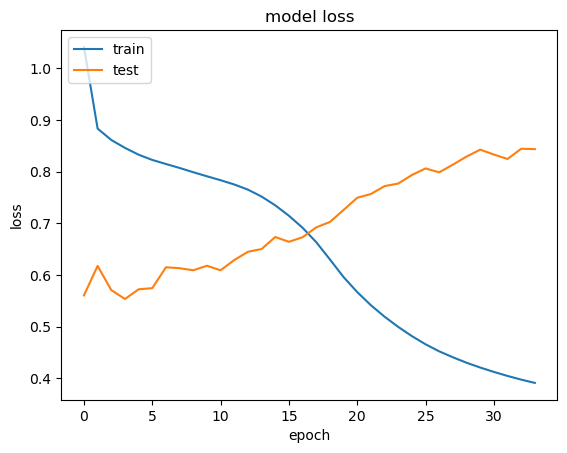

In [12]:

num_inputs = X_train.shape[1]
num_outputs = y_train.shape[1]

input_layer = tf.keras.Input(shape=(num_inputs,))
x = layers.Dense(config['hidden_dim'], activation='relu')(input_layer)
x = layers.LayerNormalization()(x)
x = layers.Dropout(config['dropout'])(x)
for layer in range(config['num_layers'] - 1):
    residual = x
    x = layers.Dense(config['hidden_dim'], activation='relu')(x)
    x = layers.LayerNormalization()(x)
    x = layers.Dropout(config['dropout'])(x)
    # x = layers.Dense(hidden_dim, activation='relu')(x)
    # x = layers.LayerNormalization()(x)
    # x = layers.Dropout(dropout_rate)(x)
    x = layers.Add()([x, residual])
output_layer = layers.Dense(num_outputs)(x)

model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
optimizer = tf.keras.optimizers.Adam(learning_rate=config['lr'])
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
model.summary()
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, min_lr=0.00001, verbose=1)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath='../models/best_model.h5', monitor='val_loss',
                                                 save_best_only=True, verbose=1)
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, verbose=1)
# wandb_callback = wandb.keras.WandbCallback(monitor="val_loss",
#                                                    log_weights=True, save_model=False)
model.fit(X_train, y_train, epochs=config['epochs'], batch_size=config['batch_size'], validation_data=(X_test, y_test),
          callbacks=[lr_callback, cp_callback, es_callback])

# plot the loss
import matplotlib.pyplot as plt
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [8]:

# predict
model = tf.keras.models.load_model('../models/best_model.h5')
y_pred = model.predict(X_test)
y_pred = values_scaler.inverse_transform(y_pred)
y_test = values_scaler.inverse_transform(y_test)


# calculate abs error along axis 1
error_abs = np.abs(y_pred - y_test)
square_error = np.square(y_pred - y_test)
mse = np.mean(np.square(error_abs))
mae = np.mean(error_abs)
print("MSE: ", mse)
print("MAE: ", mae)


MSE:  0.0164667545410087
MAE:  0.09535560572292531
